#BIA Project 2023
# Employment Analytics: DataScience Jobs

##Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

#ETL (Extract,Transform and Load the dataset)

In [3]:
df = pd.read_csv('/content/data_cleaned_2021.csv')
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree', 'Country', 'State'],
      dtype='object')

#ETL
pd.get_dummies():
1.  pd.get_dummies(df_model) is a function in the Pandas library that is used for one-hot encoding categorical variables in a DataFrame.
2.   One-hot encoding is a technique for encoding categorical data where each category is represented as a binary vector. For example, if a column in a DataFrame contains categorical values like "red," "blue," and "green," one-hot encoding would create three new columns, one for each value, where each row would have a 1 in the column corresponding to its category and 0s in the others.


The pd.get_dummies(df_model) function takes a DataFrame (df_model) as input and returns a new DataFrame where each categorical variable has been one-hot encoded. The function scans the DataFrame for columns that contain categorical data and then creates new columns for each category, using 1s and 0s to indicate the presence or absence of each category in each row.

In [4]:
df_model = df[['Avg Salary(K)', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
             'Job Location', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
             'seniority_by_title']]
df_dum = pd.get_dummies(df_model)

#ETL
train_test_split is a function in the Scikit-learn library that is commonly used to split a dataset into two subsets: a training set and a test set. This function is useful for evaluating the performance of machine learning models on new data.

In [5]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('Avg Salary(K)', axis =1)
y = df_dum['Avg Salary(K)'].values
type(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model

##1. LinearRegression:

LinearRegression() is a class in the Scikit-learn library that represents a linear regression model. Linear regression is a simple linear approach to modeling the relationship between a dependent variable and one or more independent variables. The goal of linear regression is to find the line of best fit that minimizes the sum of the squared differences between the predicted and actual values.
 

*   cross_val_score is a function in the Scikit-learn library that performs k-fold.cross-validation on a dataset and returns the score of the specified estimator (i.e., machine learning model) for each fold.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [9]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

tpred_lm = lm.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,tpred_lm))

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, tpred_lm)
print(f'MSE: {mse:.2f}')

# Calculate the R-squared value
r2 = r2_score(y_test, tpred_lm)
print(f'R-squared: {r2:.2f}')

MAE 54120493236.730865
MSE: 122030099288469872312320.00
R-squared: -77802851117849804800.00


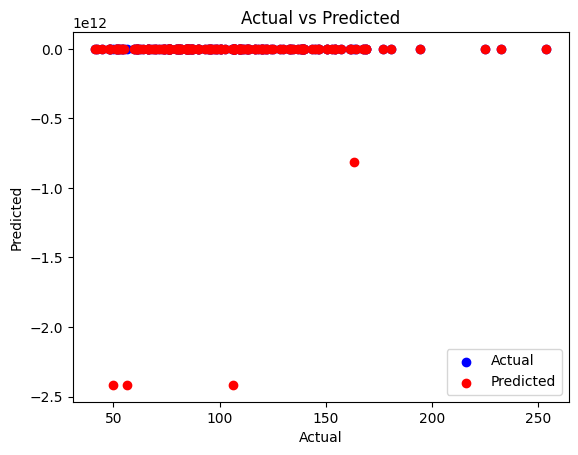

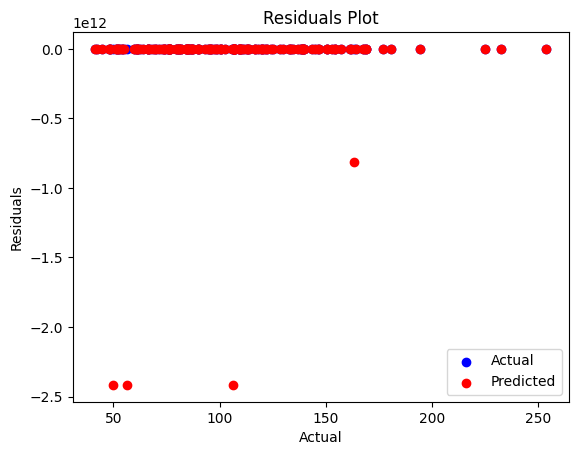

In [10]:
import matplotlib.pyplot as plt

# Predict the target variable for the test data
y_pred = lm.predict(X_test)

# Plot actual vs predicted
#plt.scatter(y_test, y_pred)
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

#Model

##2.Lasso regression:
 
 Lasso regression:(short for Least Absolute Shrinkage and Selection Operator) is a linear regression technique that involves adding a penalty term to the cost function of the linear regression model. The penalty term is based on the L1 norm of the coefficients of the linear regression model, and it encourages the model to select only the most important features and to reduce the coefficients of less important features to zero.

In [11]:
from sklearn.linear_model import Lasso
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

tpred_lml = lm_l.predict(X_test)
print("MAE",mean_absolute_error(y_test,tpred_lml))

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, tpred_lml)
print(f'MSE: {mse:.2f}')

# Calculate the R-squared value
r2 = r2_score(y_test, tpred_lml)
print(f'R-squared: {r2:.2f}')

MAE 23.575378615053772
MSE: 924.71
R-squared: 0.41


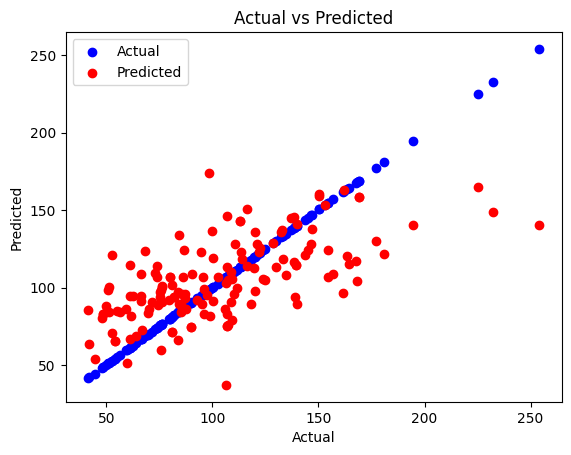

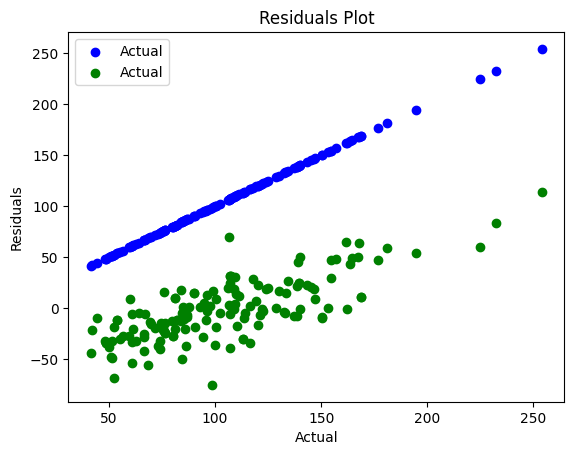

In [13]:
import matplotlib.pyplot as plt

# Predict the target variable for the test data
y_pred = lm_l.predict(X_test)

import matplotlib.pyplot as plt

# Predict the target variable for the test data
y_pred = lm_l.predict(X_test)

# Plot actual vs predicted
# Plot actual vs predicted with different colors
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals
plt.scatter(y_test,y_test, color = 'blue', label = 'Actual') 
plt.scatter(y_test,residuals, color='green', label = 'Actual')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

### Actual vs Residuals Plot:
An actual vs residual plot is a type of plot used in regression analysis to visualize the difference between the actual target values and the predicted values of a regression model.

The plot typically shows a scatter of data points, where each point represents a sample from the dataset. The horizontal line at zero on the y-axis represents the ideal scenario where the predicted values are equal to the actual values. The vertical distance between a data point and this line represents the residual for that data point.

#Model

##3. Random Forest:

Random Forest is a machine learning algorithm used for both classification and regression tasks. It is an ensemble learning method that combines multiple decision trees to make more accurate predictions. The name "Random Forest" comes from the fact that the algorithm creates a forest of decision trees and each tree is built using a random subset of the available features.

The main idea behind Random Forest is to create a large number of decision trees and combine their predictions to obtain a more accurate and stable result. Each decision tree is trained on a random subset of the training data and a random subset of the features. This randomness helps to prevent overfitting and ensures that the trees are diverse and uncorrelated.


GridSearchCV is a function from the Scikit-learn library that is used to perform a hyperparameter tuning search for a machine learning model. It searches through a specified parameter grid, which is a combination of different hyperparameters and their possible values, to find the optimal combination of hyperparameters that result in the best performance of the model.

In [14]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
#parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
parameters = {'n_estimators':range(10,300,10), 
              'criterion':('squared_error', 'friedman_mse', 'absolute_error'), 
              
              'max_features':('sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_
tpred_rf = gs.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_test,tpred_rf)
print(f'mae:{mae:2f}')
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, tpred_rf)
print(f'MSE: {mse:.2f}')

# Calculate the R-squared value
r2 = r2_score(y_test, tpred_rf)
print(f'R-squared: {r2:.2f}')

mae:14.816580
MSE: 487.44
R-squared: 0.69


In [15]:
print(gs.best_estimator_)

RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                      n_estimators=50)


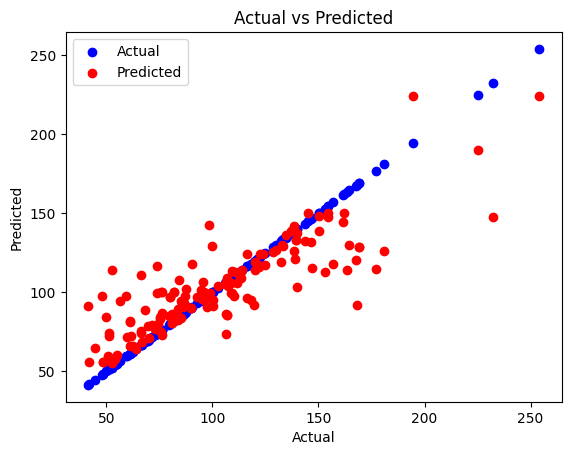

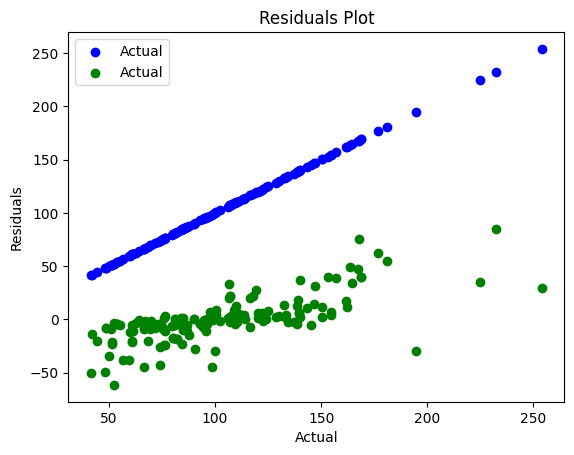

In [16]:
import matplotlib.pyplot as plt

# Predict the target variable for the test data
#y_pred = lm_l.predict(X_test)
y_pred = gs.best_estimator_.predict(X_test)
import matplotlib.pyplot as plt

# Predict the target variable for the test data
##y_pred = lm_l.predict(X_test)

# Plot actual vs predicted
# Plot actual vs predicted with different colors
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
# Calculate the residuals
residuals = y_test - y_pred
# Plot the residuals
plt.scatter(y_test,y_test, color = 'blue', label = 'Actual') 
plt.scatter(y_test,residuals, color='green', label = 'Actual')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

#Model

##4. Artifical Neural Network: 

**KerasRegressor** is a class in the keras.wrappers.scikit_learn module that allows you to use a Keras neural network model as a scikit-learn estimator for regression tasks. The advantage of using KerasRegressor is that it provides a familiar interface for tuning hyperparameters using scikit-learn's GridSearchCV and RandomizedSearchCV functions.

The **create_model** function defines the architecture of the neural network model. In this example, the model consists of a single hidden layer with a specified number of neurons, an activation function, and a dropout rate to help prevent overfitting. The hidden layer is followed by a single output layer, which predicts the target variable.

The **Dense layer **is used to specify the number of neurons in each layer, the activation function, and the regularizer, which is l2 in this case. l2 is a regularization technique that adds a penalty term to the loss function to discourage the model from relying too heavily on any one feature. The Dropout layer randomly drops out a fraction of the inputs to the next layer during each training iteration to help prevent overfitting.

The **model.compile** method is used to specify the loss function and optimizer to use during training. In this example, we use mean squared error as the loss function and the specified optimizer.

GridSearchCV is then used to perform a grid search over the specified hyperparameters, which include the batch size, number of epochs, optimizer, activation function, number of neurons, dropout rate, and weight decay. GridSearchCV fits the model using the training data for each combination of h 

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l2
from tensorflow.keras.layers import Dropout
# define the neural network architecture
def create_model(input_dim=171, optimizer='adam', activation='relu', neurons=64, dropout_rate=0.0, weight_decay=0.0):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation=activation, kernel_regularizer=l2(weight_decay)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# create a KerasRegressor based on the neural network architecture
model = KerasRegressor(build_fn=create_model, verbose=0)

# define the hyperparameters to be tuned
parameters = {
    'batch_size': [ 32, 64],
    'epochs': [200,300,500,1000],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu'],
    'neurons': [128],
    'dropout_rate': [0.1, 0.2],
    'weight_decay': [0.0,0.01]
}

<ipython-input-26-be6d5d553cc8>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


In [27]:
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(X_train, y_train)

In [34]:
from keras.models import save_model

# Save the best model found by GridSearchCV
best_model = grid_search.best_estimator_.model
save_model(best_model, '/content/best_all_model.h5')

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# print the best hyperparameters and performance metrics
print(f"Best score: {grid_result.best_score_:.2f} using {grid_result.best_params_}")
tpred_ann = grid_result.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_test,tpred_ann)
print("mae",mae)
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, tpred_ann)
print(f'MSE: {mse:.2f}')

# Calculate the R-squared value
r2 = r2_score(y_test, tpred_ann)
print(f'R-squared: {r2:.2f}')

Best score: -822.65 using {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 1000, 'neurons': 128, 'optimizer': 'adam', 'weight_decay': 0.0}
mae 14.124604577186124
MSE: 534.19
R-squared: 0.66


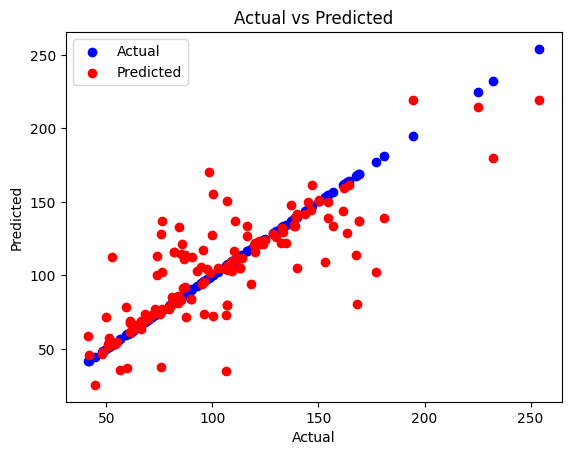

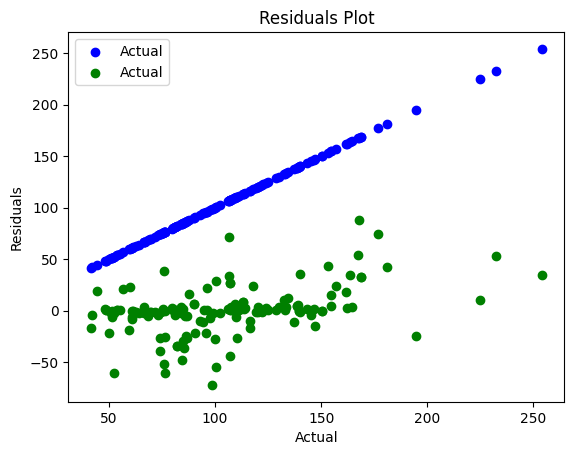

In [33]:

import matplotlib.pyplot as plt
import seaborn as sns

# predict on the test set using the best estimator from GridSearchCV
y_pred = grid_result.best_estimator_.predict(X_test)

import matplotlib.pyplot as plt

# plot actual vs predicted values
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Calculate the residuals
residuals = y_test - y_pred
# Plot the residuals
plt.scatter(y_test,y_test, color = 'blue', label = 'Actual') 
plt.scatter(y_test,residuals, color='green', label = 'Actual')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

**Conclusion:**

After analyzing the dataset of Data Science jobs, I have used various input features such as average salary, company size, type of ownership, industry, sector, job location, and several programming languages like Python, SQL, and SAS to predict the output feature, average salary. I have implemented four different machine learning models: Linear regression, Lasso regression, Random Forest, and Keras Regression.
so, finally our result looks like:


|Model Name|	MAE|	MSE|	R-2|
|-----|-----|-----|----|
|Linear Regression|	54120493236.73	|1.2203 x 10^23|	-7.7803 x 10^19|
|Lasso Regression |	23.575|	924.71	|0.41|
|Random Forest	|14.8165|	487.44|	0.69|
|Keras Regression	|14.124|	534.19|	0.66|

Upon analyzing the results, I found that Linear regression has the highest Mean Absolute Error (MAE), Mean Squared Error (MSE), and negative R-squared value, indicating that the model doesn't fit the data well. On the other hand, Lasso regression, Random Forest, and Keras Regression have performed better than Linear regression. Among them, Random Forest has the lowest MAE and MSE, and the highest R-squared value, indicating that this model predicts the average salary more accurately.

Therefore, we can conclude that **Random Forest is the best model** for predicting the average salary of Data Science jobs based on the given input features.